In [1]:
import sys
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

# AnalyzeResults


## Load data

In [2]:
apache_projects = pd.read_csv(results_path+'ApacheResults.csv') 
github_projects = pd.read_csv(results_path+'GitHubResults.csv') 
many4j_projects = pd.read_csv(results_path+'Many4JResults.csv') 
all_projects    = pd.read_csv(results_path+'AllResults.csv') 

## Change days to years

In [3]:
apache_projects['Age'] = apache_projects['Age'].map(lambda days: days/365.) 
github_projects['Age'] = github_projects['Age'].map(lambda days: days/365.) 
many4j_projects['Age'] = many4j_projects['Age'].map(lambda days: days/365.) 
all_projects['Age'] = all_projects['Age'].map(lambda days: days/365.) 

## 1. Size Analysis (# commits)

In [4]:
def scatterPlot(x_value):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))
    ax1.scatter(x=apache_projects[x_value], y=apache_projects["Testability_C"], label="Apache")
    ax1.scatter(x=github_projects[x_value], y=github_projects["Testability_C"], label="GitHub")
    ax1.scatter(x=many4j_projects[x_value], y=many4j_projects["Testability_C"], label="Many4J")
    
    ax2.scatter(x=apache_projects[x_value], y=apache_projects["Testability_B"], label="Apache")
    ax2.scatter(x=github_projects[x_value], y=github_projects["Testability_B"], label="GitHub")
    ax2.scatter(x=many4j_projects[x_value], y=many4j_projects["Testability_B"], label="Many4J")
    
    ax3.scatter(x=apache_projects[x_value], y=apache_projects["Testability_T"], label="Apache")
    ax3.scatter(x=github_projects[x_value], y=github_projects["Testability_T"], label="GitHub")
    ax3.scatter(x=many4j_projects[x_value], y=many4j_projects["Testability_T"], label="Many4J")

    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax3.set_xscale('log')
    
    ax1.set_title("Testability_C")
    ax2.set_title("Testability_B")
    ax3.set_title("Testability_T")

    plt.legend()
    plt.legend()
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("latex_figures/"+x_value+"-scatterplot.pdf")
    plt.show(block=True);

In [5]:
alpha = 1e-3
def isNormalDistribution(name, data):
    k2, p = stats.normaltest(list(data.values))
    
    if p < alpha: 
        print("{:s} is NOT a normal distribution: p = {:g}".format(name, p))
    else: 
        print("{:s} is a normal distribution: p = {:g}".format(name, p))

In [6]:
def describeResults(metric,dataset, name, data):
    return [
        dataset,
        name,
        len(data.index),
        data[metric].mean(),
        100*data['Source buildability'].mean(),
        100*data['Test buildability'].mean(),
        100*data['Testability_C'].mean(),
        100*data['Testability_B'].mean(),
        100*data['Testability_T'].mean()
    ]

In [7]:
def describeResultsByQuartile(metric, dataset, df):

    q1 = df[metric].quantile(0.25)
    short_df = df[ df[metric]< q1 ]
    short_summary = describeResults(metric,dataset,"Short",short_df)
    
    q3 = df[metric].quantile(0.75)
    medium_df = df.query("`%s` >= %d and `%s` < %d"%(metric,q1,metric, q3))
    medium_summary = describeResults(metric,dataset,"Medium",medium_df)
    
    large_df = df[ df[metric] >= q3 ]
    large_summary = describeResults(metric,dataset,"Large",large_df)
    
    all_df = describeResults(metric,dataset,"All", df)
    
    summary = [short_summary, medium_summary, large_summary] #, all_df]
    
    print(dataset)
    print("Q1: %d"%q1)
    print("Q3: %d"%q3)
    
    returned_df = pd.DataFrame(summary, columns = [
        "Dataset",
        "",
        "# of projects",
        metric+" Mean",
        "Source buildability",
        "Test buildability", 
        "Testability_C",
        "Testability_B",
        "Testability_T"
    ]).round(decimals=2)
    return returned_df

In [8]:
def allDescriptiobByDataset(metric):
    return pd.concat([
        describeResultsByQuartile(metric, "Apache",apache_projects),
        describeResultsByQuartile(metric, "GitHub",github_projects),
        describeResultsByQuartile(metric, "Many4j",many4j_projects),
        #describeResultsByQuartile(metric, "All",all_projects)
    ], ignore_index=True).set_index(['Dataset', '']).T

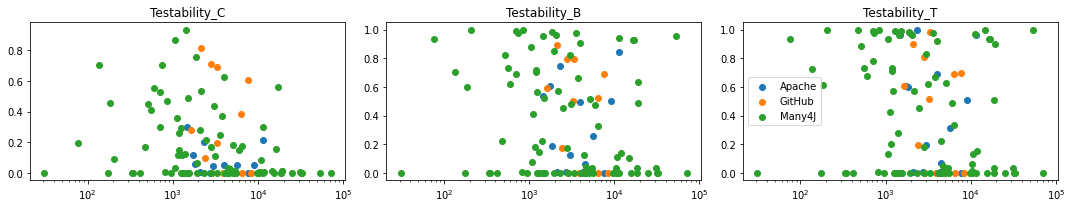

In [9]:
scatterPlot('Total Commits')

In [10]:
allDescriptiobByDataset('Total Commits')


Apache
Q1: 2210
Q3: 5068
GitHub
Q1: 2693
Q3: 6382
Many4j
Q1: 1110
Q3: 9853


Dataset               Apache                     GitHub                    \
                       Short   Medium    Large    Short   Medium    Large   
# of projects           4.00     7.00     4.00     3.00     6.00     3.00   
Total Commits Mean   1786.50  3603.57  8421.25  2053.33  3745.33  7489.00   
Source buildability    45.46    27.17    18.20    64.67    70.71    71.32   
Test buildability      71.52    74.47    67.06    95.55    83.95    66.31   
Testability_C          12.06     4.61     7.85    39.82    33.12    20.10   
Testability_B          33.35    20.49    40.03    55.24    43.39    22.89   
Testability_T          54.39    28.07    44.60    56.57    49.85    23.14   

Dataset              Many4j                     
                      Short   Medium     Large  
# of projects         21.00    42.00     21.00  
Total Commits Mean   520.67  3025.36  21990.76  
Source buildability   44.69    43.00     15.85  
Test buildability     63.74    69.39     60.01  
Testability_C         28.23    17.22      5.48  
Testability_B         48.77    32.87     25.37  
Testability_T         54.21    37.56     31.68

## 2. Age Analysis (# years)

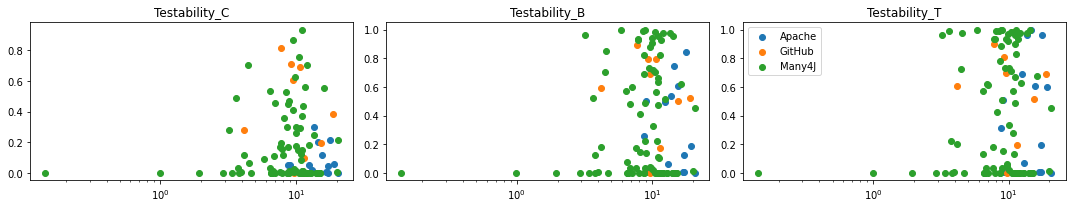

In [11]:
scatterPlot('Age')

In [12]:
allDescriptiobByDataset('Age')

Apache
Q1: 10
Q3: 17
GitHub
Q1: 9
Q3: 12
Many4j
Q1: 6
Q3: 11


Dataset             Apache               GitHub               Many4j         \
                     Short Medium  Large  Short Medium  Large  Short Medium   
# of projects         4.00   6.00   4.00   3.00   7.00   3.00  21.00  41.00   
Age Mean              8.40  14.36  18.71   7.06  10.54  16.29   4.33   8.68   
Source buildability  23.78  36.94  28.72  76.53  75.93  53.78  34.71  41.05   
Test buildability    69.75  81.91  52.46  98.53  88.48  57.51  47.08  74.73   
Testability_C         2.62  11.57   7.99  60.47  30.05  19.36  11.21  19.70   
Testability_B        19.16  40.73  28.85  75.88  34.91  33.96  23.94  38.59   
Testability_T        20.74  55.50  43.97  77.01  38.23  40.08  27.70  44.17   

Dataset                     
                     Large  
# of projects        21.00  
Age Mean             13.78  
Source buildability  30.66  
Test buildability    57.68  
Testability_C        13.85  
Testability_B        30.27  
Testability_T        35.62

## 3. LoC Analysis (# LoC)

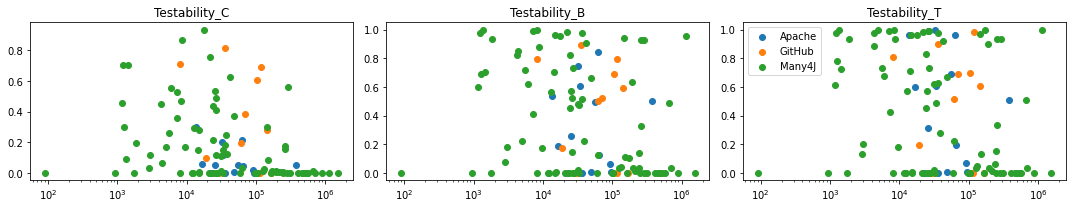

In [13]:
scatterPlot('LoC')

In [14]:
allDescriptiobByDataset('LoC')

Apache
Q1: 24158
Q3: 64105
GitHub
Q1: 34185
Q3: 124166
Many4j
Q1: 9103
Q3: 182060


Dataset                Apache                         GitHub            \
                        Short    Medium      Large     Short    Medium   
# of projects            4.00      7.00       4.00      3.00      6.00   
LoC Mean             13237.75  42116.86  157332.00  19020.67  84121.83   
Source buildability     38.96     27.62      23.92     64.27     79.10   
Test buildability       53.52     73.61      86.57     62.49     90.77   
Testability_C            9.16      9.07       2.96     26.93     44.90   
Testability_B           18.26     42.13      17.26     32.13     56.47   
Testability_T           39.30     51.04      19.49     33.31     63.00   

Dataset                          Many4j                       
                         Large    Short    Medium      Large  
# of projects             3.00    21.00     41.00      21.00  
LoC Mean             268533.00  3888.95  50603.22  482002.81  
Source buildability      54.95    50.40     42.25      13.65  
Test buildability        85.72    74.49     68.39      54.51  
Testability_C             9.43    30.10     17.21       4.46  
Testability_B            19.84    55.52     32.23      21.43  
Testability_T            20.12    61.79     38.89      23.30

## 4. All Analysis

In [15]:
def allDescription():
    return pd.concat([
        describeResultsByQuartile('Total Commits', 'Total Commits',all_projects),
        describeResultsByQuartile('Age', 'Age',all_projects),
        describeResultsByQuartile('LoC', 'LoC',all_projects)
    ], ignore_index=True).set_index(['Dataset', '']).T

In [16]:
allDescription()

Total Commits
Q1: 1298
Q3: 6451
Age
Q1: 7
Q3: 12
LoC
Q1: 13871
Q3: 144834


Dataset             Total Commits                       Age                \
                            Short   Medium     Large  Short Medium  Large   
# of projects               28.00    55.00     28.00  28.00  57.00  28.00   
Total Commits Mean         691.75  3192.36  18643.25    NaN    NaN    NaN   
Source buildability         46.60    44.54     21.42  37.04  44.70  31.94   
Test buildability           65.52    74.51     58.76  55.00  79.46  60.78   
Testability_C               25.81    18.13      7.21  12.08  22.75  10.00   
Testability_B               46.27    33.41     26.28  24.66  41.17  29.10   
Testability_T               53.62    38.71     31.49  28.09  47.48  35.85   
Age Mean                      NaN      NaN       NaN   4.93   9.70  15.55   
LoC Mean                      NaN      NaN       NaN    NaN    NaN    NaN   

Dataset                  LoC                       
                       Short    Medium      Large  
# of projects          28.00     54.00      28.00  
Total Commits Mean       NaN       NaN        NaN  
Source buildability    51.48     44.10      18.99  
Test buildability      71.94     73.44      57.07  
Testability_C          27.87     18.58       4.93  
Testability_B          49.05     34.81      22.00  
Testability_T          55.38     40.95      26.78  
Age Mean                 NaN       NaN        NaN  
LoC Mean             5360.57  49632.67  421167.43

## 4.1 Test normality distribution of testability

In [17]:
isNormalDistribution("Testability_C", all_projects['Testability_C'])
isNormalDistribution("Testability_B", all_projects['Testability_B'])
isNormalDistribution("Testability_T", all_projects['Testability_T'])

Testability_C is NOT a normal distribution: p = 3.70818e-07
Testability_B is NOT a normal distribution: p = 4.57658e-22
Testability_T is NOT a normal distribution: p = 0


## 4.2 Correlation

In [18]:
testabilities = [
    'Testability_C', 
    'Testability_B', 
    'Testability_T'
]
metrics = [
    'Total Commits',
    'Age',
    'LoC',
]
for metric in metrics:
    print(metric)
    for testability in testabilities:
        print("  "+testability)
        print('    - Spearman test: ', 
              all_projects[testability].corr(all_projects[metric], method='spearman'))
        print('    - Kendall test: ', 
              all_projects[testability].corr(all_projects[metric], method='kendall'))

Total Commits
  Testability_C
    - Spearman test:  -0.2759532439704382
    - Kendall test:  -0.20452066898239038
  Testability_B
    - Spearman test:  -0.19639301093854244
    - Kendall test:  -0.1414055215561215
  Testability_T
    - Spearman test:  -0.1891104105468065
    - Kendall test:  -0.13831745285848857
Age
  Testability_C
    - Spearman test:  -0.005523356585338316
    - Kendall test:  0.000862299438408603
  Testability_B
    - Spearman test:  0.00028976446977158234
    - Kendall test:  0.003276737865952691
  Testability_T
    - Spearman test:  0.012721668638703802
    - Kendall test:  0.012779438423095927
LoC
  Testability_C
    - Spearman test:  -0.3463101484066568
    - Kendall test:  -0.2519442640235911
  Testability_B
    - Spearman test:  -0.2768513385947475
    - Kendall test:  -0.20043410155979707
  Testability_T
    - Spearman test:  -0.2627640226727561
    - Kendall test:  -0.18825458082185403


## 5. Testability per projects

In [19]:
def getProjectsByMetric(dataset, metric, percent, comp):
    if comp == 'greater':
        return dataset[ dataset[metric] >= percent ]
    else:
        return dataset[ dataset[metric] <= percent ]

def getProjectsByTestability(dataset, comp):
    return [ 
        len(getProjectsByMetric(dataset, "Testability_C", 0.30, comp).index),
        len(getProjectsByMetric(dataset, "Testability_B", 0.84, comp).index),
        len(getProjectsByMetric(dataset, "Testability_T", 0.98, comp).index),
    ]

## 5.1 Best projects per Testability (count)

In [20]:
apache_best = getProjectsByTestability(apache_projects, "greater")
github_best = getProjectsByTestability(github_projects, "greater")
many4j_best = getProjectsByTestability(many4j_projects, "greater")
pd.DataFrame([
    ["Apache"] + apache_best,
    ["Github"] + github_best,
    ["Many4J"] + many4j_best
], columns = [
        "Dataset",
        "Testability_C",
        "Testability_B",
        "Testability_T",
]).T

,0,1,2
Dataset,Apache,Github,Many4J
Testability_C,1,5,18
Testability_B,1,1,16
Testability_T,1,1,9


In [21]:
def topProjectsBy(dataset, metric):
    return (dataset.sort_values(by=metric, ascending=False).head(6)
            #[['Project', 'Dataset', 'Age', 'LoC', 'Total Commits']]
            #.set_index(['Project'])
           )

## 5.2 Best projects per Testability (Details)

### Best Projects (Testability C)

In [22]:
topProjectsBy(all_projects,'Testability_C').head(3).T

,40,63,24
Project,jsoup,spark,jsprit
Dataset,ManySStub4J,ManySStub4J,GitHub
Age,11.120548,9.547945,7.780822
LoC,17831.0,8655.0,35643.0
Total Commits,1442,1062,2122
Source buildable commits,1410,1051,1950
Source buildability,0.977809,0.989642,0.918944
Test buildable commits,1403,986,1927
Test buildability,0.995035,0.938154,0.988205
Testable commits,1349,921,1735


### Best Projects (Testability B)

In [23]:
topProjectsBy(all_projects,'Testability_B').head(3).T

,47,44,104
Project,otto,javapoet,dagger
Dataset,ManySStub4J,ManySStub4J,ManySStub4J
Age,5.852055,8.876712,8.479452
LoC,1344.0,8306.0,7190.0
Total Commits,205,846,703
Source buildable commits,18,398,376
Source buildability,0.087805,0.470449,0.534851
Test buildable commits,18,396,376
Test buildability,1.0,0.994975,1.0
Testable commits,18,396,373


### Best Projects (Testability T)

In [24]:
topProjectsBy(all_projects,'Testability_T').sort_values(by='Testability_B', ascending=False).head(3).T

,47,44,88
Project,otto,javapoet,camel
Dataset,ManySStub4J,ManySStub4J,ManySStub4J
Age,5.852055,8.876712,14.276712
LoC,1344.0,8306.0,1146447.0
Total Commits,205,846,53286
Source buildable commits,18,398,21
Source buildability,0.087805,0.470449,0.000394
Test buildable commits,18,396,20
Test buildability,1.0,0.994975,0.952381
Testable commits,18,396,20
